In [21]:
 #this code snippet was used to import our custom dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# import all necessary modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# set the variables to work with throughout model
img_height = 256
img_width= 256
rgb = 3
batch_size = 10  
epochs = 50

In [24]:
# set-up training data from the original dataset only
ods_train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/original_data_set', # need local path to directory
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 123,
    validation_split = 0.3,
    subset = 'training',
)

Found 3000 files belonging to 10 classes.
Using 2100 files for training.


In [25]:
# set-up training data using original plus the augmented data as well
plusAugmented_train = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/plusAugmented', # need local path to directory
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 123,
    validation_split = 0.3,
    subset = 'training',
)

Found 32898 files belonging to 10 classes.
Using 23029 files for training.


In [26]:
# now create a batch to test with from original dataset
ods_test = tf.keras.preprocessing.image_dataset_from_directory(
   '/content/drive/MyDrive/original_data_set', # need local path to directory
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 456,
    validation_split = 0.3,
    subset = "validation",
)

Found 3000 files belonging to 10 classes.
Using 900 files for validation.


In [27]:
# also need a batch to test with from the original plus augmented dataset
plusAugmented_test = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/plusAugmented', # need local path to directory
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 456,
    validation_split = 0.3,
    subset = "validation",
)

Found 32898 files belonging to 10 classes.
Using 9869 files for validation.


In [28]:
# the real test....
# NOW, a batch of unseen originals the plusAugmented model has not seen
unseen_test = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/unseen_originals', # need local path to directory
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 456,
)

Found 102 files belonging to 10 classes.


In [29]:
#  build up model
model = keras.models.Sequential()
model.add(keras.layers.Convolution2D(16, kernel_size = (5, 5), input_shape=(img_height, img_width, rgb ), activation='relu'))
model.add(keras.layers.Convolution2D(16, kernel_size = (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.2))
# have to make sure we pass the correct shape to LSTM
# use reshape to convert from 2D to 3D!
model.add(keras.layers.Reshape((125, -1)))
# using TimeDistributed layer
# this makes sure the dense layer keeps track of the 
# temporal aspects of the data
model.add(keras.layers.TimeDistributed(layers.Dense(50)))
model.add(keras.layers.LSTM(50, return_sequences=False))
model.add(keras.layers.Dense(10,activation = 'softmax'))

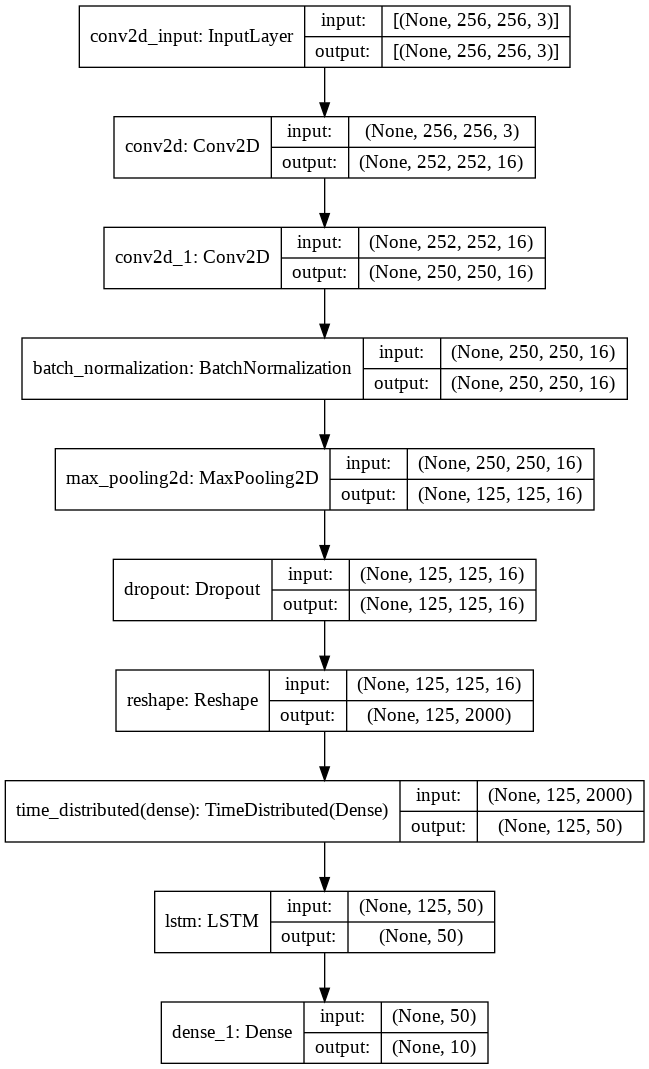

In [10]:
# display model layers w/ input and output from layers
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [30]:
# compile model   
model.compile(optimizer = keras.optimizers.Adam(),
             loss = [ keras.losses.CategoricalCrossentropy(from_logits=True)],
             metrics = [ keras.metrics.CategoricalAccuracy()])

In [31]:
# show a summary of layers and the parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 252, 252, 16)      1216      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 250, 250, 16)      2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 250, 250, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 125, 125, 16)      0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 125, 2000)         0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 125, 50)          

In [32]:
# training the original dataset
ods_history = model.fit(ods_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1)

Epoch 1/50
210/210 [==============================] - 14s 58ms/step - loss: 2.2910 - categorical_accuracy: 0.1507
Epoch 2/50
210/210 [==============================] - 12s 58ms/step - loss: 1.8988 - categorical_accuracy: 0.3519
Epoch 3/50
210/210 [==============================] - 12s 58ms/step - loss: 1.6556 - categorical_accuracy: 0.4436
Epoch 4/50
210/210 [==============================] - 12s 57ms/step - loss: 1.4310 - categorical_accuracy: 0.5358
Epoch 5/50
210/210 [==============================] - 12s 57ms/step - loss: 1.3174 - categorical_accuracy: 0.5619
Epoch 6/50
210/210 [==============================] - 12s 57ms/step - loss: 1.3262 - categorical_accuracy: 0.5303
Epoch 7/50
210/210 [==============================] - 12s 57ms/step - loss: 1.2098 - categorical_accuracy: 0.5858
Epoch 8/50
210/210 [==============================] - 12s 57ms/step - loss: 1.1933 - categorical_accuracy: 0.6112
Epoch 9/50
210/210 [==============================] - 12s 57ms/step - loss: 1.2202 - cat

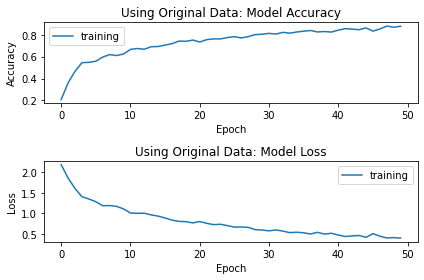

In [33]:
# how did we do?
# graphically display results of training
plt.figure()
plt.subplot(211)
plt.plot(ods_history.history['categorical_accuracy'])
plt.title('Using Original Data: Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc = 'upper left')

plt.subplot(212)
plt.plot(ods_history.history['loss'])
plt.title('Using Original Data: Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training'], loc = 'upper right')

plt.tight_layout()
plt.show()

In [34]:
# go ahead and save the model here
model.save("ods_16_a.h5")

In [35]:
# now test the model against the reserved unseen images from the original dataset
ods_t = model.evaluate(ods_test, verbose = 1)
print("Using only original test samples:")
print("Accuracy: ", ods_t[1] * 100)
print("Loss: ", ods_t[0])

90/90 [==============================] - 5s 44ms/step - loss: 0.6670 - categorical_accuracy: 0.7833
Using only original test samples:
Accuracy:  78.33333611488342
Loss:  0.666989803314209


In [36]:
# next, we need to train with the original plus the augmented data on the exact same architecture
plusAugmented_history = model.fit(plusAugmented_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1)

Epoch 1/50
2303/2303 [==============================] - 3396s 1s/step - loss: 1.2548 - categorical_accuracy: 0.5912
Epoch 2/50
2303/2303 [==============================] - 135s 59ms/step - loss: 1.0261 - categorical_accuracy: 0.6572
Epoch 3/50
2303/2303 [==============================] - 135s 59ms/step - loss: 0.8734 - categorical_accuracy: 0.7091
Epoch 4/50
2303/2303 [==============================] - 134s 58ms/step - loss: 0.8552 - categorical_accuracy: 0.7144
Epoch 5/50
2303/2303 [==============================] - 135s 58ms/step - loss: 0.7675 - categorical_accuracy: 0.7459
Epoch 6/50
2303/2303 [==============================] - 135s 58ms/step - loss: 0.7097 - categorical_accuracy: 0.7659
Epoch 7/50
2303/2303 [==============================] - 135s 59ms/step - loss: 0.6431 - categorical_accuracy: 0.7869
Epoch 8/50
2303/2303 [==============================] - 133s 58ms/step - loss: 0.6179 - categorical_accuracy: 0.7943
Epoch 9/50
2303/2303 [==============================] - 133s 58ms

In [37]:
# save one last time
model.save("pA_16.h5")

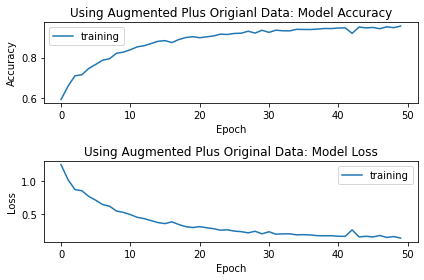

In [38]:
# how did we do?
# graphically display results of training
plt.figure()
plt.subplot(211)
plt.plot(plusAugmented_history.history['categorical_accuracy'])
plt.title('Using Augmented Plus Origianl Data: Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc = 'upper left')

plt.subplot(212)
plt.plot(plusAugmented_history.history['loss'])
plt.title('Using Augmented Plus Original Data: Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training'], loc = 'upper right')

plt.tight_layout()
plt.show()


In [39]:
# now let's test with unseen images from the augmented plus original dataset
plusAugmented_history_test = model.evaluate(plusAugmented_test, verbose = 1)
print("Using the augmented plus original test samples:")
print("Accuracy: ", plusAugmented_history_test[1] * 100)
print("Loss: ", plusAugmented_history_test[0])

987/987 [==============================] - 599s 601ms/step - loss: 0.2732 - categorical_accuracy: 0.9137
Using the augmented plus original test samples:
Accuracy:  91.36690497398376
Loss:  0.2732284367084503


In [43]:
# NOW, let's test with 100 super secret unseen original images
unseen_test_history = model.evaluate(unseen_test, verbose = 1)
print("Using completely unseen originals only:")
print("Accuracy: ", unseen_test_history[1] * 100)
print("Loss: ", unseen_test_history[0])

11/11 [==============================] - 1s 16ms/step - loss: 0.0760 - categorical_accuracy: 0.9706
Using completely unseen originals only:
Accuracy:  97.0588207244873
Loss:  0.0760301724076271
